In this example, we investigate and document the theoretical time complexity of insertion sort and experimentally compare its runtime to other sorting algorithms: radix sort, heap sort, & Tim sort.

See comments for time complexity explanation line-by-line

In [1]:
from itertools import chain
import time
import random
import matplotlib.pyplot as plt
import heapq as hq

In [2]:
def insertionSort(myArray):
    '''
    Performs insertion sort
    
    Arguments
    ---------
    myArray: list
       list to be sorted
    
    Returns
    --------
    none: sorts in-place      
    
    Note: Computational Step Count Estimates (worst case) shown in comments
    '''
    
    n = len(myArray)                                               # c1: constant number of steps
    for i in range(n):                                             # c2*n: a linear number of steps 
        temp = myArray[i]                                          # c3: a constant number of steps
        for k in range(i-1, -1, -1):                               # c4*(1+2+3+...+n): a quadratic number of steps
            if temp < myArray[k]:                                  # c5*(1+2+3+...+n)
                myArray[k + 1] = myArray[k]                        # c6*(1+2+3+...+n)
                myArray[k] = temp                                  # c7*(1+2+3+...+n)
            else:
                break

    # Over all computational step count T(n) for insertions sort with list of size n:
        # T(n) = c1 + c2*n+ c3*n + (c4 + c5 + c6 + c7)(n(n-1)/2)
        # Thus T(n) is O(n^2)

In [3]:
def getDigits(l):
    '''
    Helper Method for Radix Sort
    Find the number of digits in the largest number in the list
    
    Arguments 
    ---------
    l: list
       pre-sorted list
       
    Returns
    ---------
    str
       number of digits in the largest number in the list
    '''
    ## current maximum number of digits
    m = 0                                                            ## Steps: c1
    
    ## for each item in the list
    for item in l:                                                   ## Steps: c2*n
        m = max(item, m)                                             ## Steps: c3
    
    ## convert to a string and find the maximum number of digits d
    return len(str(m))                                               ## Steps: c4*d 

    # T(n,d) for getDigits is O(n + d)

def radixSort(l, numDigits):
    '''
    Do radix sort
    
    Arguments
    ---------
    l: list
       pre-sorted list
    
    Returns
    --------
    list
       sorted list       
    '''
    ## for the number of digits needed to represent the max value
    for digit in range(0, numDigits):                               ## Steps: c1*d
        
        ## create a list of lists, where each list is a buck to store that
        ## numeric positions number
        intList = [[] for _ in range(10)]                           ## Steps: c2
        
        ## for each item find the number at the current numeric positon
        for item in l:                                              ## Steps: c3*nd
            num = item // 10**digit % 10                            ## Steps: c4*nd
            intList[num].append(item)                               ## Steps: c5*nd
            
        ## update the list 
        l = list(chain(*intList))                                   ## Steps: c6*n
        
    return  l

    # T(n) for radix sort is O(nd)

In [4]:
def heapsort(iterable):
    ## initialize an empty list
    h = []                                                          # step = c
    
    ## for each value in the list
    for value in iterable:                                          # step = O(n)
        ## push that item onto the heap
        ## Doing a lazy insert would be better here :)
        hq.heappush(h, value)                                       # step = O(n log n), 
    ## return the list after removing the smallest item from the list
    ## until the list is completely sorted
    return [hq.heappop(h) for i in range(len(h))]                   # step = O(n log n)

     # T(n) for heap sort is O(n log n) 

Main Method:
Run trials comparing the runtime of sorting algorithms for different sized, randomly-initialized input lists

Text(0, 0.5, 'Runtime')

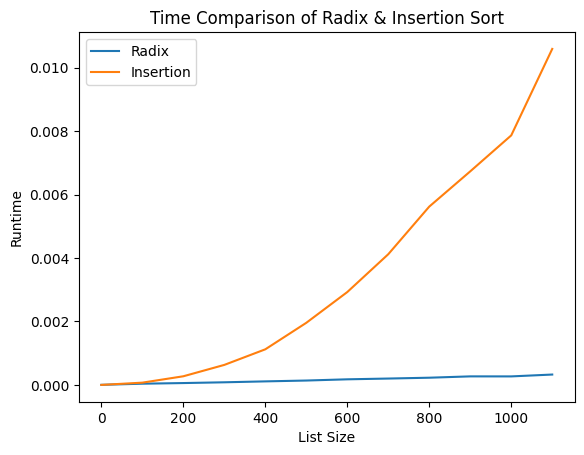

In [5]:
'''
Run trials and record the runtimes of each sorting algorithm
'''
## record the time results
radixTime = []
heapTime  = []
defaultTime = []
insertionTime =[]

size = 1200
stepSize = 100
## calculate the time required to sort various size lists
for i in range(0, size, stepSize):
    ## generate the random list
    rList = random.sample(range(0, size), i)
    
    ## do the radix sort
    start = time.perf_counter()
    numDigits = getDigits(rList)
    radixSort(rList, numDigits)
    radixTime.append(time.perf_counter() - start)
    
    ## do the insertion sort
    start = time.perf_counter()
    insertionSort(rList)
    insertionTime.append(time.perf_counter() - start)
    
    ## do the default python sort (Tim Sort)
    start = time.perf_counter()
    sorted(rList)
    defaultTime.append(time.perf_counter() - start)

## plot the results
plt.plot(range(0, size, stepSize), radixTime, label = 'Radix')
plt.plot(range(0, size, stepSize), insertionTime, label = 'Insertion')
#plt.plot(range(0, size, stepSize), defaultTime, label = 'Default')
plt.legend(frameon = 'none')
plt.title('Time Comparison of Radix & Insertion Sort')
plt.xlabel('List Size')
plt.ylabel('Runtime')
